## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import cv2
from tensorflow.keras.utils import plot_model
import os
import matplotlib.pyplot as plt
%matplotlib inline

## Import Data

In [ ]:
train_dir = r'D:\AI\Deep Learning\Projects\Emotion-Detection-Project\artifacts\train'
test_dir = r'D:\AI\Deep Learning\Projects\Emotion-Detection-Project\artifacts\test'

print(len(os.listdir(train_dir)))
print(len(os.listdir(test_dir)))

7
7


(48, 48, 3)

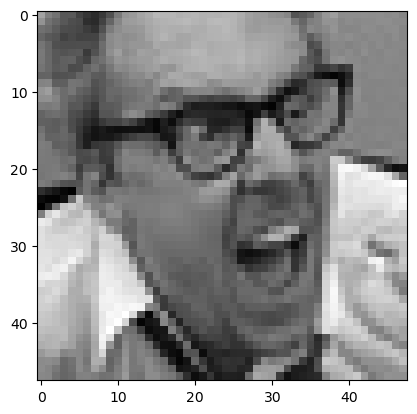

In [ ]:
# ANGRY
img = cv2.imread(r'D:\AI\Deep Learning\Projects\1\train/0/Training_3908.jpg')
plt.imshow(img)
img.shape

## Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                   shear_range=0.2,
                                   rotation_range=40,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1.0/255.0)

trainDatagen=train_datagen.flow_from_directory(train_dir,
                                              target_size=(48,48),
                                              batch_size=100,
                                              class_mode='categorical',
                                              color_mode='rgb')

valDatagen=val_datagen.flow_from_directory(test_dir,
                                              target_size=(48,48),
                                              batch_size=100,
                                              class_mode='categorical',
                                              color_mode='rgb')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## Using Resnet-50

In [3]:
base_model = tf.keras.applications.ResNet50(input_shape =(64,64,3),include_top=False,weights='imagenet')

94765736/94765736 [==============================] - 2s 0us/step


## Build Model Architecture

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(base_model)  # Assuming base_model is defined elsewhere in your code
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=(48, 48, 3)))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=3, padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2, padding='same'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

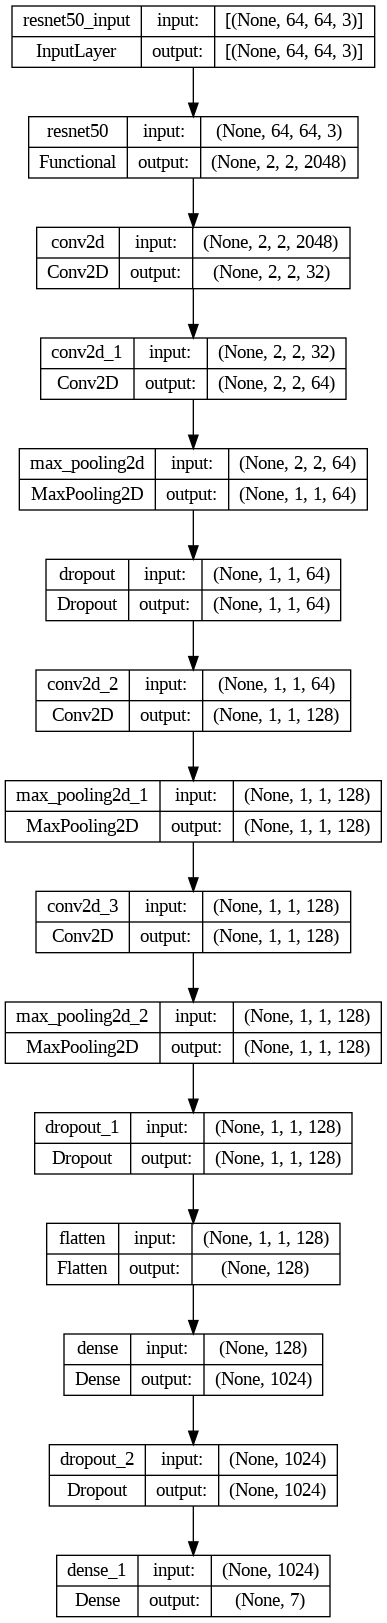

In [5]:
plot_model(model, show_shapes=True)

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.001, amsgrad=True),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') >= 0.99:
            self.model.stop_training = True
            print("MODEL HAS REACHED AMAZING ACCURACY")

## Training

In [ ]:
history = model.fit(trainDatagen,validation_data=valDatagen,batch_size = 32 ,epochs=50,shuffle = True)

Epoch 1/50


288/288 [==============================] - 647s 2s/step - loss: 1.6420 - accuracy: 0.3428 - val_loss: 2.0311 - val_accuracy: 0.1709
Epoch 2/50
288/288 [==============================] - 585s 2s/step - loss: 1.4698 - accuracy: 0.4269 - val_loss: 1.8907 - val_accuracy: 0.2381
Epoch 3/50
288/288 [==============================] - 601s 2s/step - loss: 1.4104 - accuracy: 0.4609 - val_loss: 1.5408 - val_accuracy: 0.4110
Epoch 4/50
288/288 [==============================] - 642s 2s/step - loss: 1.3637 - accuracy: 0.4779 - val_loss: 1.7035 - val_accuracy: 0.3121
Epoch 5/50
288/288 [==============================] - 594s 2s/step - loss: 1.3349 - accuracy: 0.4967 - val_loss: 1.3401 - val_accuracy: 0.4918
Epoch 6/50
288/288 [==============================] - 616s 2s/step - loss: 1.2953 - accuracy: 0.5126 - val_loss: 1.2778 - val_accuracy: 0.5118
Epoch 7/50
288/288 [==============================] - 590s 2s/step - loss: 1.2682 - accuracy: 0.5198 - val_loss: 1.4270 - val_accuracy: 0.48

## Plot the Loss & Accuracy Curve

In [ ]:
# Extract loss and accuracy from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

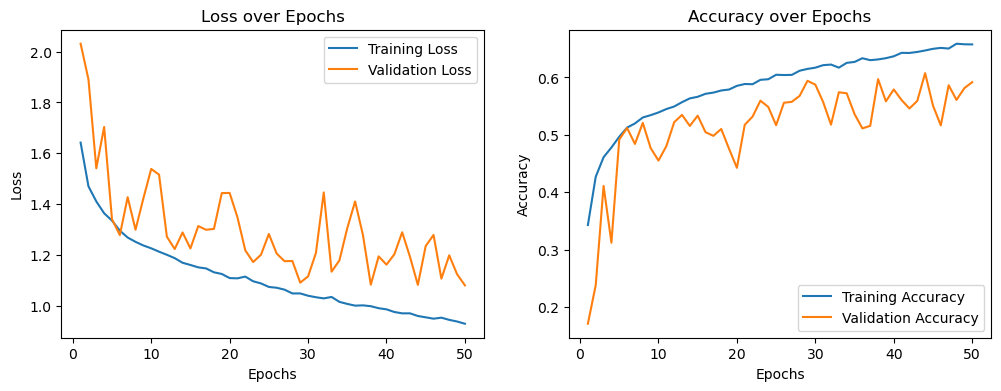

In [ ]:
import matplotlib.pyplot as plt

# Assuming you trained for 50 epochs
epochs_range = range(1, 51)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


## Save and Export Model

In [ ]:
model.save('Resnet Emotion Detection.model')

INFO:tensorflow:Assets written to: Resnet Emotion Detection.model\assets


INFO:tensorflow:Assets written to: Resnet Emotion Detection.model\assets


In [ ]:
model.save_weights('Resnet Emotion Detection.h5')

In [ ]:
# save model structure in jason file
model_json = model.to_json()
with open("Resnet Emotion Detection.json", "w") as json_file:
    json_file.write(model_json)